# Contrução do código

- Importações

In [59]:
import numpy as np
import matplotlib.pyplot as plt

- Função conversora de números para o padrão lista de binários 

In [53]:
def converter_binario(num):
    binario = bin(num)[2:]
    binario = '0'*(8-len(binario)) + binario
    return [int(x) for x in binario]

In [56]:
converter_binario(50)

[0, 0, 1, 1, 0, 0, 1, 0]

- Função que gera as regras de transição

In [132]:
def gerar_regras(y):
    yr = y[::-1]
    regras = {}
    for n in range(8):
        binario = bin(n)[2:]
        chave = '0'*(3-len(binario)) + binario
        regras[chave] = yr[n]
    return regras

In [198]:
gerar_regras(converter_binario(110))

{'000': 0,
 '001': 1,
 '010': 1,
 '011': 1,
 '100': 0,
 '101': 1,
 '110': 1,
 '111': 0}

- Função principal, gera a grade de evolução

In [155]:
def gerar_matriz(num_regra, ntempos, vetor:np.array):

    MAX = ntempos
    NVETOR = len(vetor)
    g = vetor
    ng = np.zeros(NVETOR)
    regra = gerar_regras(converter_binario(num_regra))

    matriz_evolucao = np.zeros((MAX, NVETOR))

    for t in range(1,MAX):
        matriz_evolucao[t] = g
        for i in range(NVETOR):

            chave = f"{g[i-1]:.0f}{g[i]:.0f}{g[(i+1)%NVETOR]:.0f}"
            ng[i] = regra[chave]

        g = ng.copy()
        
    plt.figure(1)
    plt.axis('off')
    plt.imshow(matriz_evolucao, cmap='gray')
    plt.show()
    

# Testes de regras

Regra 50 (Classe II)

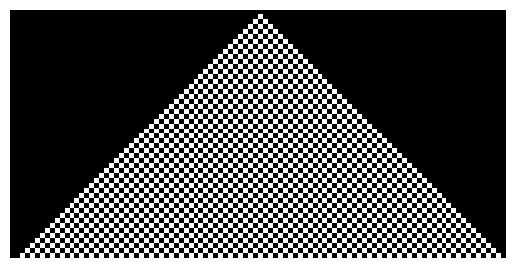

In [156]:
NVETOR = 100
vetor = np.zeros(NVETOR)
vetor[NVETOR//2] = 1

gerar_matriz(50, 50, vetor)

Regra 30 (Classe III)

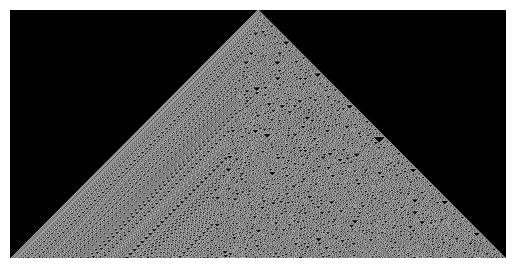

In [176]:
NVETOR = 1000
vetor = np.zeros(NVETOR)
vetor[NVETOR//2] = 1

gerar_matriz(30, 500, vetor)

Regra 90 (Classe III)

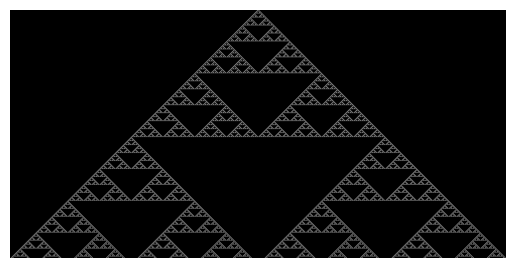

In [168]:
NVETOR = 1000
vetor = np.zeros(NVETOR)
vetor[NVETOR//2] = 1

gerar_matriz(90, 500, vetor)

Regra 110 (Classe IV)

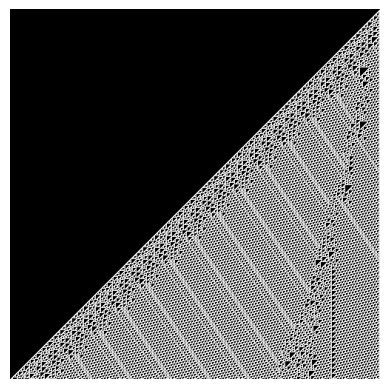

In [183]:
NVETOR = 500
vetor = np.zeros(NVETOR)
vetor[NVETOR-1] = 1

gerar_matriz(110, 500, vetor)

Regra 184 (Classe II)

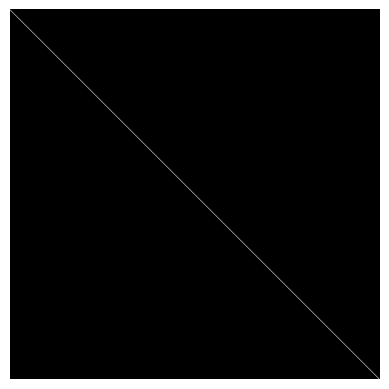

In [194]:
NVETOR = 500
vetor = np.zeros(NVETOR)
vetor[0] = 1


gerar_matriz(184, 500, vetor)